# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observations

1. From the Plot, it has been confired that there is clear relation between Latitude and Max Temperature. We know it as a common sense that the more it get close to north or south pole, the more it get cold. It because the difference in sunshine per area so the area around the equator is warm and around the pole is cold. This data analysis proofed that.

2. There is clear difference in size of the land between Northern Hemisphere & Southern Hemisphere. The rough ratio between them are North:South=2:1. It has been represented in plot of the Latitude & Max Temperature. The minimum is around -50 but the max is around 80. It because there are no city to represet the temperature around south pole. (Antarctic Continent doesn't belong to any countries.) Also there are more data points in Northern Hemisphere by the nature of geometry.

3. The rest of the plots don't show the clear relations, which means that the other weather phenomena aren't driven by just latitude. Let's think about Sahara desert. It locates in Africa between Lat 20~30 and it's very dry area by the nature of desert. Let's see the Asian city. Hong Kong (Lat 22) and Shanghai (Lat 31) are not desert. It's  natural to consider that there are other dominant aspect for the reset of the weather phenomena other than Max Temperature.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import requests
import json
import datetime as dt


# Import API key
from api_keys import g_key, weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# > This has been done in step later. (After deleting 100%> Humidity cities.)

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats_rdm = np.random.uniform(-90, 90, 1500)
lngs_rdm = np.random.uniform(-180, 180, 1500)
lat_lngs = pd.DataFrame({"Lat": lats_rdm, "Lng": lngs_rdm})
# After several trial, it's been foundout that
# 1500 is reasonablely small sampling amount with final counting exceeds 500.

# Identify nearest city for each lat, lng combination
for i in range(0, len(lat_lngs)-1):
    city = citipy.nearest_city(lat_lngs.iloc[i]["Lat"], lat_lngs.iloc[i]["Lng"]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Test by "London" to check the API structures in OpenWeather API
# api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
units = "imperial"
test_city = "london"
query_url = f"{base_url}{test_city}&units={units}&appid={weather_api_key}"
response = requests.get(query_url)
data = response.json()
print(json.dumps(data, indent=2, sort_keys=True))

{
  "base": "stations",
  "clouds": {
    "all": 75
  },
  "cod": 200,
  "coord": {
    "lat": 51.5085,
    "lon": -0.1257
  },
  "dt": 1619411848,
  "id": 2643743,
  "main": {
    "feels_like": 33.1,
    "humidity": 65,
    "pressure": 1025,
    "temp": 40.39,
    "temp_max": 41,
    "temp_min": 39.99
  },
  "name": "London",
  "sys": {
    "country": "GB",
    "id": 1414,
    "sunrise": 1619412096,
    "sunset": 1619464480,
    "type": 1
  },
  "timezone": 3600,
  "visibility": 10000,
  "weather": [
    {
      "description": "broken clouds",
      "icon": "04n",
      "id": 803,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 60,
    "speed": 12.66
  }
}


In [4]:
# Test by "xyz" to check the API structures in Error Case
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
units = "imperial"
test_city = "xyz"
query_url = f"{base_url}{test_city}&units={units}&appid={weather_api_key}"
response = requests.get(query_url)
data = response.json()
print(json.dumps(data, indent=2, sort_keys=True))

{
  "cod": "404",
  "message": "city not found"
}


In [5]:
# Extract weather data from OpenWeather API based on the cities list.

# Set required lists.
cities_data = []
latitude = []
longitude = []
max_temp = []
hum = []
cldnss = []
wind_spd = []
countries = []
date =[]
count = 0

# Loop throught the "cities" and obtain the required information.
for city in cities:
    query_url = f"{base_url}{city}&units={units}&appid={weather_api_key}"
    response = requests.get(query_url)
    data = response.json()
    count += 1
    
    try:
        latitude.append(data["coord"]["lat"])
        longitude.append(data["coord"]["lon"])
        max_temp.append(data["main"]["temp_max"])
        hum.append(data["main"]["humidity"])
        cldnss.append(data["clouds"]["all"])
        wind_spd.append(data["wind"]["speed"])
        countries.append(data["sys"]["country"])
        date.append(data["dt"])
        cities_data.append(city)
        print(f"Processeing Record {count} | {city}")
        
    except (KeyError, IndexError):
        print(f"City not found. Skipping Record {count} | {city}...")

# Set Data Download Date
download_date = dt.datetime.today().strftime("%d/%m/%Y")

Processeing Record 1 | yeppoon
Processeing Record 2 | bambous virieux
Processeing Record 3 | hit
Processeing Record 4 | kodiak
Processeing Record 5 | beringovskiy
Processeing Record 6 | albany
Processeing Record 7 | hermanus
Processeing Record 8 | camacha
City not found. Skipping Record 9 | amderma...
Processeing Record 10 | vaini
Processeing Record 11 | taoudenni
Processeing Record 12 | khatanga
Processeing Record 13 | torbay
Processeing Record 14 | rikitea
Processeing Record 15 | golden
Processeing Record 16 | pinega
Processeing Record 17 | yellowknife
Processeing Record 18 | praya
Processeing Record 19 | ancud
Processeing Record 20 | bayburt
Processeing Record 21 | baherden
Processeing Record 22 | souillac
Processeing Record 23 | rawson
Processeing Record 24 | lawrenceburg
Processeing Record 25 | lexington park
Processeing Record 26 | cape town
Processeing Record 27 | puerto ayora
Processeing Record 28 | panama city
City not found. Skipping Record 29 | taolanaro...
Processeing Recor

Processeing Record 232 | asau
Processeing Record 233 | sandwick
Processeing Record 234 | korla
Processeing Record 235 | saquena
Processeing Record 236 | keighley
Processeing Record 237 | port elizabeth
Processeing Record 238 | richards bay
Processeing Record 239 | banda aceh
Processeing Record 240 | san quintin
Processeing Record 241 | palu
Processeing Record 242 | vicuna
Processeing Record 243 | melaka
Processeing Record 244 | castro
Processeing Record 245 | umm lajj
Processeing Record 246 | ucluelet
Processeing Record 247 | mayo
Processeing Record 248 | bethel
Processeing Record 249 | zaterechnyy
Processeing Record 250 | pangnirtung
Processeing Record 251 | te anau
Processeing Record 252 | georgetown
Processeing Record 253 | napoleon
Processeing Record 254 | roebourne
Processeing Record 255 | danilov
Processeing Record 256 | sept-iles
Processeing Record 257 | beaufort
Processeing Record 258 | delvada
Processeing Record 259 | zyryanka
Processeing Record 260 | kuytun
Processeing Record

Processeing Record 465 | gold coast
City not found. Skipping Record 466 | ye...
Processeing Record 467 | verkhoyansk
Processeing Record 468 | airai
Processeing Record 469 | tazovskiy
City not found. Skipping Record 470 | louisbourg...
Processeing Record 471 | bathsheba
Processeing Record 472 | miandrivazo
Processeing Record 473 | pacific grove
Processeing Record 474 | kuching
Processeing Record 475 | finschhafen
City not found. Skipping Record 476 | tepexi...
Processeing Record 477 | severomorsk
Processeing Record 478 | togur
Processeing Record 479 | marfino
Processeing Record 480 | hlobyne
Processeing Record 481 | springbok
Processeing Record 482 | atherton
Processeing Record 483 | rio gallegos
Processeing Record 484 | orange
Processeing Record 485 | bonavista
Processeing Record 486 | hambantota
Processeing Record 487 | minbu
Processeing Record 488 | makakilo city
Processeing Record 489 | oistins
Processeing Record 490 | guozhen
Processeing Record 491 | javanrud
Processeing Record 492

## Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_df = pd.DataFrame({"City": cities_data,
                          "Lat": latitude,
                          "Lng": longitude,
                          "Max Temp": max_temp,
                          "Humidity": hum,
                          "Cloudiness": cldnss,
                          "Wind Speed": wind_spd,
                          "Country": countries,
                          "Date": date})
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yeppoon,-23.1333,150.7333,80.60,34,40,9.22,AU,1619412131
1,bambous virieux,-20.3428,57.7575,78.01,88,75,14.97,MU,1619412131
2,hit,33.6416,42.8251,90.48,16,100,11.14,IQ,1619412131
3,kodiak,57.7900,-152.4072,42.80,81,1,9.22,US,1619412131
4,beringovskiy,63.0500,179.3167,31.55,90,44,2.10,RU,1619412131


In [7]:
# Output Summary of the Dataframe
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02
mean,19.227941,19.324172,61.308163,68.771231,51.636049,7.502426,1.619412e+09
std,33.377476,89.866066,19.793533,23.406055,37.551113,5.083781,8.034272e+01
min,-54.800000,-179.166700,6.800000,1.000000,0.000000,0.160000,1.619412e+09
25%,-7.608700,-63.258500,45.050000,57.000000,15.000000,3.440000,1.619412e+09
50%,20.894700,26.687600,62.730000,73.000000,47.000000,6.640000,1.619412e+09
75%,46.844000,99.184400,77.490000,88.000000,90.000000,10.040000,1.619412e+09
max,78.218600,179.316700,101.590000,100.000000,100.000000,38.230000,1.619412e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# Delete cities (humidity > 100%)
cities_df = cities_df.drop(cities_df[cities_df.Humidity > 100].index)

# Output to CSV File
cities_df.to_csv("output_data/cities_df.csv")

# Check Total of Cities
len(cities_df)

577

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

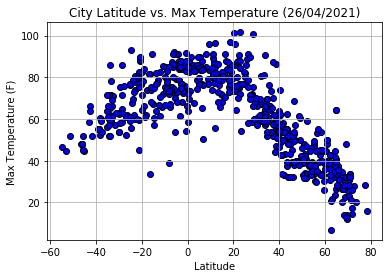

Thise code is for visualizing relation between City Latitude & Max Temperature. From the plot, it could be observed that the Max Temps peak out around the 0 Latitude.


In [9]:
# Create the plot
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], color= "blue", edgecolors='black')

# Format axes
plt.title(f"City Latitude vs. Max Temperature ({download_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save figure
plt.savefig("output_data/01_Lat_vs_Max_Temp.png")

# Show plot
plt.show()

print("Thise code is for visualizing relation between City Latitude & Max Temperature.\
 From the plot, it could be observed that the Max Temps peak out around the 0 Latitude.")

## Latitude vs. Humidity Plot

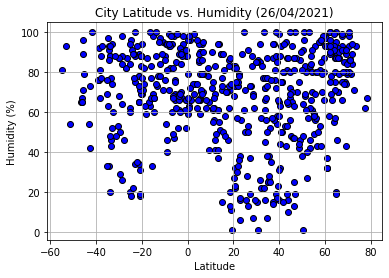

Thise code is for visualizing relation between City Latitude & Humidity. From the plot, There are no noticeable trend.


In [10]:
# Create the plot
plt.scatter(cities_df["Lat"], cities_df["Humidity"], color= "blue", edgecolors='black')

# Format axes
plt.title(f"City Latitude vs. Humidity ({download_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save figure
plt.savefig("output_data/02_Lat_vs_Humidity.png")

# Show plot
plt.show()

print("Thise code is for visualizing relation between City Latitude & Humidity.\
 From the plot, There are no noticeable trend.")

## Latitude vs. Cloudiness Plot

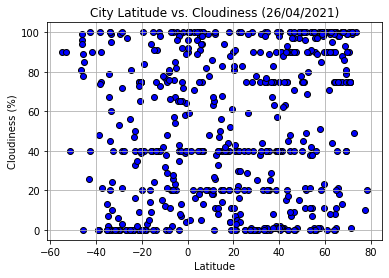

Thise code is for visualizing relation between City Latitude & Cloudiness. From the plot, There are no noticeable trend.


In [11]:
# Create the plot
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], color= "blue", edgecolors='black')

# Format axes
plt.title(f"City Latitude vs. Cloudiness ({download_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save figure
plt.savefig("output_data/03_Lat_vs_Cloudiness.png")

# Show plot
plt.show()

print("Thise code is for visualizing relation between City Latitude & Cloudiness.\
 From the plot, There are no noticeable trend.")

## Latitude vs. Wind Speed Plot

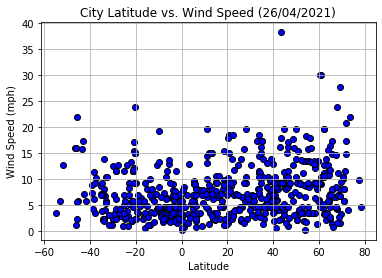

Thise code is for visualizing relation between City Latitude & Wind Speed. From the plot, There are no noticeable trend.


In [12]:
# Create the plot
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], color= "blue", edgecolors='black')

# Format axes
plt.title(f"City Latitude vs. Wind Speed ({download_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save figure
plt.savefig("output_data/04_Lat_vs_Cloudiness.png")

# Show plot
plt.show()

print("Thise code is for visualizing relation between City Latitude & Wind Speed.\
 From the plot, There are no noticeable trend.")

## Linear Regression

In [13]:
# Create Northern Hemisphere Dataframe & Southern Hemisphere Dataframe
north_cities_df = cities_df.drop(cities_df[cities_df.Lat <= 0].index)
south_cities_df = cities_df.drop(cities_df[cities_df.Lat >= 0].index)
print(len(north_cities_df))
print(len(south_cities_df))

389
188


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.88.


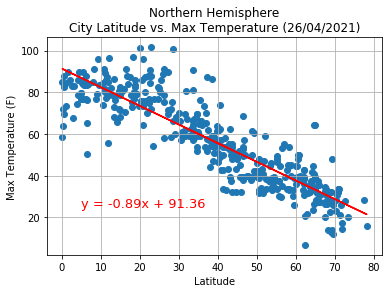

In [14]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_cities_df["Lat"], north_cities_df["Max Temp"])
regress_values = north_cities_df["Lat"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.scatter(north_cities_df["Lat"], north_cities_df["Max Temp"])
plt.plot(north_cities_df["Lat"], regress_values, "r-")
plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title(f"Northern Hemisphere\nCity Latitude vs. Max Temperature ({download_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save figure
plt.savefig("output_data/05_North_Lat_vs_Max_Temp.png")


# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.61.


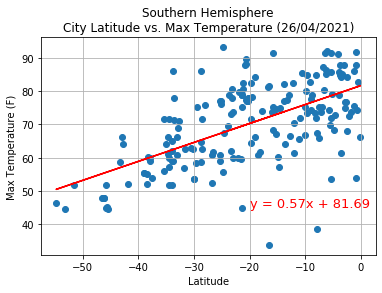

This code & the one above are for visualizing relation between City Latitude & Max Temperature. From the plot, You can observe clear relation between Latitude & Max Temperature. It also match with the common sense that the more it get close to the north or south pole, the more it get colder. The r-value in each hemisphere is also reasonably high.


In [15]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_cities_df["Lat"], south_cities_df["Max Temp"])
regress_values = south_cities_df["Lat"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.scatter(south_cities_df["Lat"], south_cities_df["Max Temp"])
plt.plot(south_cities_df["Lat"], regress_values, "r-")
plt.annotate(line_eq,(-20,45),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title(f"Southern Hemisphere\nCity Latitude vs. Max Temperature ({download_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save figure
plt.savefig("output_data/06_South_Lat_vs_Max_Temp.png")

# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

print("This code & the one above are for visualizing relation between City Latitude & Max Temperature.\
 From the plot, You can observe clear relation between Latitude & Max Temperature.\
 It also match with the common sense that the more it get close to the north or south pole,\
 the more it get colder. The r-value in each hemisphere is also reasonably high.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.17.


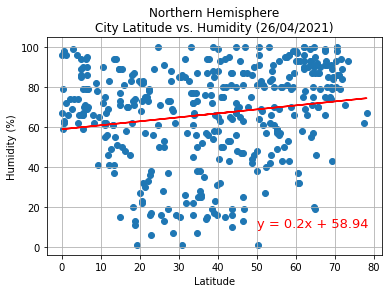

In [16]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_cities_df["Lat"], north_cities_df["Humidity"])
regress_values = north_cities_df["Lat"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.scatter(north_cities_df["Lat"], north_cities_df["Humidity"])
plt.plot(north_cities_df["Lat"], regress_values, "r-")
plt.annotate(line_eq,(50,10),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title(f"Northern Hemisphere\nCity Latitude vs. Humidity ({download_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save figure
plt.savefig("output_data/07_North_Lat_vs_Humidity.png")

# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.13.


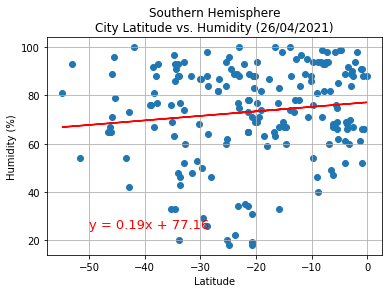

This code & the one above are for visualizing relation between City Latitude & Humidity. There are no clear relations between them. The r-values are also very low.


In [17]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_cities_df["Lat"], south_cities_df["Humidity"])
regress_values = south_cities_df["Lat"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.scatter(south_cities_df["Lat"], south_cities_df["Humidity"])
plt.plot(south_cities_df["Lat"], regress_values, "r-")
plt.annotate(line_eq,(-50,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title(f"Southern Hemisphere\nCity Latitude vs. Humidity ({download_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save figure
plt.savefig("output_data/08_South_Lat_vs_Humidity.png")

# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

print("This code & the one above are for visualizing relation between City Latitude & Humidity.\
 There are no clear relations between them. The r-values are also very low.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.17.


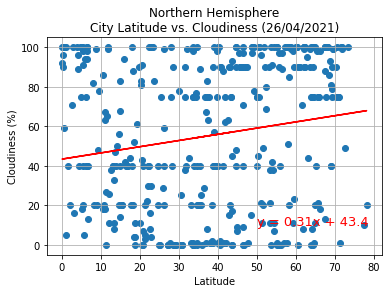

In [18]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_cities_df["Lat"], north_cities_df["Cloudiness"])
regress_values = north_cities_df["Lat"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.scatter(north_cities_df["Lat"], north_cities_df["Cloudiness"])
plt.plot(north_cities_df["Lat"], regress_values, "r-")
plt.annotate(line_eq,(50,10),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title(f"Northern Hemisphere\nCity Latitude vs. Cloudiness ({download_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save figure
plt.savefig("output_data/09_North_Lat_vs_Cloudiness.png")

# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.01.


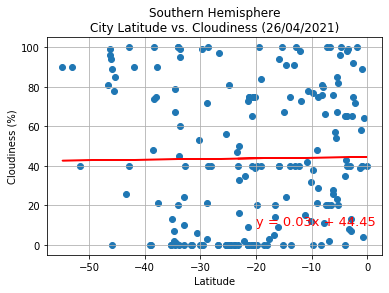

This code & the one above are for visualizing relation between City Latitude & Cloudiness. There are no clear relations between them. The r-values are also very low.


In [19]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_cities_df["Lat"], south_cities_df["Cloudiness"])
regress_values = south_cities_df["Lat"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.scatter(south_cities_df["Lat"], south_cities_df["Cloudiness"])
plt.plot(south_cities_df["Lat"], regress_values, "r-")
plt.annotate(line_eq,(-20,10),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title(f"Southern Hemisphere\nCity Latitude vs. Cloudiness ({download_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save figure
plt.savefig("output_data/10_South_Lat_vs_Cloudiness.png")

# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

print("This code & the one above are for visualizing relation between City Latitude & Cloudiness.\
 There are no clear relations between them. The r-values are also very low.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.22.


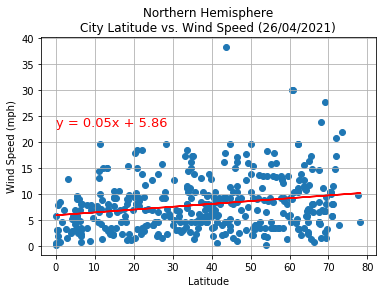

In [20]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_cities_df["Lat"], north_cities_df["Wind Speed"])
regress_values = north_cities_df["Lat"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.scatter(north_cities_df["Lat"], north_cities_df["Wind Speed"])
plt.plot(north_cities_df["Lat"], regress_values, "r-")
plt.annotate(line_eq,(0,23),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title(f"Northern Hemisphere\nCity Latitude vs. Wind Speed ({download_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save figure
plt.savefig("output_data/11_North_Lat_vs_Wind_Speed.png")

# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.21.


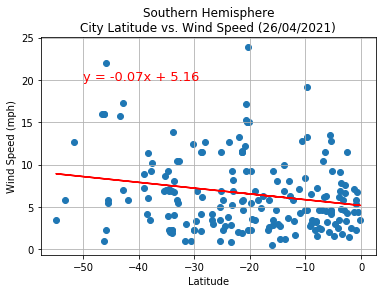

This code & the one above are for visualizing relation between City Latitude & Wind Speed. There are no clear relations between them. The r-values are also very low.


In [21]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_cities_df["Lat"], south_cities_df["Wind Speed"])
regress_values = south_cities_df["Lat"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.scatter(south_cities_df["Lat"], south_cities_df["Wind Speed"])
plt.plot(south_cities_df["Lat"], regress_values, "r-")
plt.annotate(line_eq,(-50,20),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title(f"Southern Hemisphere\nCity Latitude vs. Wind Speed ({download_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save figure
plt.savefig("output_data/12_South_Lat_vs_Wind_Speed.png")

# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

print("This code & the one above are for visualizing relation between City Latitude & Wind Speed.\
 There are no clear relations between them. The r-values are also very low.")